In [1]:
import numpy as np
import struct, os, sys
import matplotlib.pyplot as plt
import csv
import pandas as pd
import scipy.optimize as optimization
from datetime import datetime
from specs import *

In [ ]:
# dir0 = "/Users/jiyong/data/spectrum_analyzer_202507/v03/reports/"
# dir1 = "/Users/jiyong/data/spectrum_analyzer_202507/v03/results/"
# # refpath 
# from os import listdir
# from os.path import isfile, join


In [ ]:
# entryfiles = [f for f in listdir(dir0) if isfile(join(dir0, f)) and f.endswith('carentry.bin')]
# cpsfiles = [f for f in listdir(dir0) if isfile(join(dir0, f)) and f.endswith('cps.bin')]

In [3]:
def get_cps(date):

    fn = os.path.join(dir0, str(date)+"_cps.bin")
    if os.path.getsize(join(dir0, fn)) == 0:
        return None
    f1 = open(fn, 'rb') 
    dt, g1, g2, n1, n2 = [], [],[],[],[]
    while True :
        try:
          header = (struct.unpack("BBBBH", f1.read(6)))
        except:
          break
        
        data = f1.read(header[-1])
        tm = struct.unpack("HBBHHHH", data[0:12])
        dt.append(datetime(*(tm[0:7])))
        d1 = struct.unpack("ffBB", data[12:22])
        g1.append(d1[0])
        n1.append(d1[1])
        d2 = struct.unpack("ffBB", data[22:32])
        g2.append(d2[0])
        n2.append(d2[1])
        
    f1.close()
    return pd.DataFrame({"time":dt, "gamma1":g1, "neutron1":n1, "gamma2":g2, "neutron2":n2})
cpsdf=get_cps("20241016")

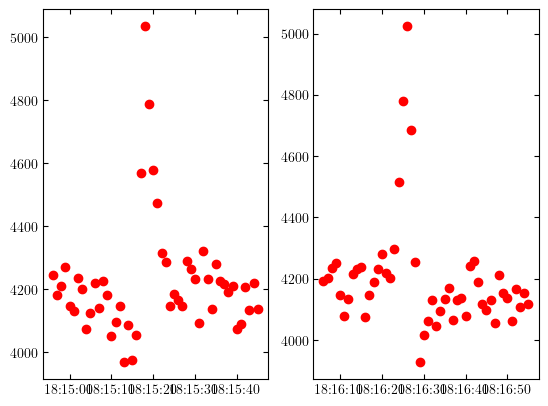

In [4]:
plt.subplot(121)
plt.plot(cpsdf["time"].iloc[3150:3200], cpsdf["gamma1"].iloc[3150:3200], "ro")
plt.subplot(122)
plt.plot(cpsdf["time"].iloc[3220:3270], cpsdf["gamma1"].iloc[3220:3270], "ro")

In [5]:
cpsdf["time"].iloc[3150], cpsdf["time"].iloc[3220]

(Timestamp('2024-10-16 18:14:56.000323'),
 Timestamp('2024-10-16 18:16:06.000290'))

In [6]:
# def get_dataframe():
#     time1, time2, nus, gammaLevel, neutronLevel, nuclides, maingbkg, fns1, fns2 =[], [], [], [], [], [], [], [], []
#     for of in entryfiles: 
#         if os.path.getsize(join(dir0, of)) == 0:
#             continue
#         f1 = open(join(dir0, of), 'rb')
#         header = (struct.unpack("BBBBH", f1.read(6)))
#         if header[0:4] == (0xf5, 0xfa, 0x12, 0x01) :
#             readmore = True
#         else :
#             readmore = False
#         while readmore:
#             t1 = struct.unpack("HBBHHHH", f1.read(12))
#             t2 = struct.unpack("HBBHHHH", f1.read(12))
#             mm = header[-1]-24
#             nu = ''.join([chr(x) for x in struct.unpack("B"*(mm-1), f1.read(mm-1)) if x !=0])
#             alarmlevel = struct.unpack("B", f1.read(1))
#             # gammaLevel = alarmlevel[0] %16
#             # neutronLevel = alarmlevel[0] // 16
            
#             q1 = "%4d%02d%02d_%02d%02d%02d"%(t1[0], t1[1], t1[2], t1[3], t1[4], t1[5])
#             #nu.append(str(alarmlevel))
#             if isfile(os.path.join(dir1, q1+"_spec.txt")) and os.path.getsize(os.path.join(dir1, q1+"_cps.txt")) :

#                 time1.append(datetime(*(t1[0:6])))
#                 time2.append(datetime(*(t2[0:6])))
#                 nus.append(nu)
#                 fns1.append(os.path.join(dir1, q1+"_spec.txt"))
#                 fns2.append(os.path.join(dir1, q1+"_cps.txt"))
#                 gammaLevel.append(alarmlevel[0] % 16)
#                 neutronLevel.append(alarmlevel[0] // 16)
#             else:
#                 # print(os.path.join(dir1, q1+"_spec.txt"), " not found")
#                 pass
            
#             q = f1.read(6)
#             if not q:
#                 readmore = False
#             else:
#                 try:
#                     header = struct.unpack("BBBBH", q)
#                 except:
#                     readmore = False
                
#                 #print("Header = ", header)
#                 if header[0:4] == (0xf5, 0xfa, 0x12, 0x01) :
#                     readmore = True
#                 else :
#                     readmore = False
#     dfs = pd.DataFrame({'time1': time1, 'time2': time2, 'glevel':gammaLevel, 'nlevel': neutronLevel,  'nuclides': nus, 'specs': fns1, 'cps': fns2})
#     dfs.sort_values(by='time1', inplace=True, ignore_index=True)
    
#     return dfs


In [7]:
dfs = get_dataframe()
def get_data(df, t1):
    dd = df[df["time1"] == datetime(*t1[0:6])]
    if dd.empty:
        return None
    _qs = "%4d%02d%02d_%02d%02d%02d"%(t1[0], t1[1], t1[2], t1[3], t1[4], t1[5])
    return read_mca(dd["specs"].iloc[0]), dd["cps"].iloc[0]
    

def view(df, idx=0):
    f1 = open(df['specs'][idx], 'r')
    
x=get_data(dfs, (2024, 10, 16, 17, 6, 21))

time1 time :  <class 'list'>


In [8]:
specs = Specs()
# dfs["specs"].iloc[1590]
# dfs.to_excel("datalog.xlsx")


time1 time :  <class 'list'>


In [10]:
specs.current_ref;

In [ ]:
specs.ref

In [12]:
qs = specs.df[specs.df.time1 > datetime(2024, 10, 16, 00, 00, 00)]

In [9]:
df1 = dfs[dfs["time1"] > datetime(2024, 10, 16, 0, 0, 0)]
df1[df1["time1"] < datetime(2024, 10, 17, 23, 59, 59)]

,time1,time2,glevel,nlevel,nuclides,specs,cps
8,2024-10-16 17:05:58,2024-10-16 17:06:04,0,0,,/Users/jiyong/data/spectrum_analyzer_202507/v0...,/Users/jiyong/data/spectrum_analyzer_202507/v0...
9,2024-10-16 17:06:21,2024-10-16 17:06:28,0,0,,/Users/jiyong/data/spectrum_analyzer_202507/v0...,/Users/jiyong/data/spectrum_analyzer_202507/v0...
10,2024-10-16 17:06:41,2024-10-16 17:06:48,0,0,,/Users/jiyong/data/spectrum_analyzer_202507/v0...,/Users/jiyong/data/spectrum_analyzer_202507/v0...
11,2024-10-16 17:12:00,2024-10-16 17:12:06,0,0,,/Users/jiyong/data/spectrum_analyzer_202507/v0...,/Users/jiyong/data/spectrum_analyzer_202507/v0...
12,2024-10-16 17:14:18,2024-10-16 17:14:30,0,0,,/Users/jiyong/data/spectrum_analyzer_202507/v0...,/Users/jiyong/data/spectrum_analyzer_202507/v0...
...,...,...,...,...,...,...,...
186,2024-10-17 14:08:21,2024-10-17 14:08:26,2,0,Cs137,/Users/jiyong/data/spectrum_analyzer_202507/v0...,/Users/jiyong/data/spectrum_analyzer_202507/v0...
187,2024-10-17 14:09:01,2024-10-17 14:09:07,2,0,,/Users/jiyong/data/spectrum_analyzer_202507/v0...,/Users/jiyong/data/spectrum_analyzer_202507/v0...
188,2024-10-17 14:09:36,2024-10-17 14:09:41,2,0,Cs137,/Users/jiyong/data/spectrum_analyzer_202507/v0...,/Users/jiyong/data/spectrum_analyzer_202507/v0...
189,2024-10-17 14:10:15,2024-10-17 14:10:20,2,0,,/Users/jiyong/data/spectrum_analyzer_202507/v0...,/Users/jiyong/data/spectrum_analyzer_202507/v0...


In [10]:
df1 = dfs[dfs["time1"] > datetime(2024, 10, 16, 0, 0, 0)]
df1[df1["time1"] < datetime(2024, 10, 17, 23, 59, 59)]

,time1,time2,glevel,nlevel,nuclides,specs,cps
8,2024-10-16 17:05:58,2024-10-16 17:06:04,0,0,,/Users/jiyong/data/spectrum_analyzer_202507/v0...,/Users/jiyong/data/spectrum_analyzer_202507/v0...
9,2024-10-16 17:06:21,2024-10-16 17:06:28,0,0,,/Users/jiyong/data/spectrum_analyzer_202507/v0...,/Users/jiyong/data/spectrum_analyzer_202507/v0...
10,2024-10-16 17:06:41,2024-10-16 17:06:48,0,0,,/Users/jiyong/data/spectrum_analyzer_202507/v0...,/Users/jiyong/data/spectrum_analyzer_202507/v0...
11,2024-10-16 17:12:00,2024-10-16 17:12:06,0,0,,/Users/jiyong/data/spectrum_analyzer_202507/v0...,/Users/jiyong/data/spectrum_analyzer_202507/v0...
12,2024-10-16 17:14:18,2024-10-16 17:14:30,0,0,,/Users/jiyong/data/spectrum_analyzer_202507/v0...,/Users/jiyong/data/spectrum_analyzer_202507/v0...
...,...,...,...,...,...,...,...
186,2024-10-17 14:08:21,2024-10-17 14:08:26,2,0,Cs137,/Users/jiyong/data/spectrum_analyzer_202507/v0...,/Users/jiyong/data/spectrum_analyzer_202507/v0...
187,2024-10-17 14:09:01,2024-10-17 14:09:07,2,0,,/Users/jiyong/data/spectrum_analyzer_202507/v0...,/Users/jiyong/data/spectrum_analyzer_202507/v0...
188,2024-10-17 14:09:36,2024-10-17 14:09:41,2,0,Cs137,/Users/jiyong/data/spectrum_analyzer_202507/v0...,/Users/jiyong/data/spectrum_analyzer_202507/v0...
189,2024-10-17 14:10:15,2024-10-17 14:10:20,2,0,,/Users/jiyong/data/spectrum_analyzer_202507/v0...,/Users/jiyong/data/spectrum_analyzer_202507/v0...


In [11]:
os.path.isfile(df1.loc[8]["cps"])

True

In [12]:
import sys

In [13]:
aq = "Co60(18,)"
aq[0:aq.find("(")]

'Co60'

In [14]:
type(dfs)

pandas.core.frame.DataFrame

dfs.type

In [15]:
cpsdf=get_cps("20241111")
cpsdf

,time,gamma1,neutron1,gamma2,neutron2
0,2024-11-11 00:00:02.000341,3784.002441,22.085056,5473.710938,22.085056
1,2024-11-11 00:00:03.000349,3784.002441,22.085056,5473.710938,22.085056
2,2024-11-11 00:00:04.000353,3784.002441,22.085056,5473.710938,22.085056
3,2024-11-11 00:00:05.000341,3784.002441,22.085056,5473.710938,22.085056
4,2024-11-11 00:00:06.000359,3784.002441,22.085056,5473.710938,22.085056
...,...,...,...,...,...
78720,2024-11-11 23:59:57.000229,5937.127441,21.207352,5585.495605,21.207352
78721,2024-11-11 23:59:58.000228,5963.828125,24.303867,5648.056641,24.303867
78722,2024-11-11 23:59:59.000226,5921.421387,36.694290,5721.602051,36.694290
78723,2024-11-12 00:00:00.000230,5939.524902,26.822994,5606.119629,26.822994
